## Hacer pruebas:

In [40]:
from skimage.measure import find_contours
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot
import torch
import cv2
from unet import UNet

In [41]:
# Mi libreria:
%load_ext autoreload
%autoreload 2
from processLIDC3 import Patient

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
# metodos = [m for m in dir(patient) if not '__' in m]
# print(metodos) 

In [43]:
# patient = Patient("LIDC-IDRI-0170")
# patient = Patient("LIDC-IDRI-0186")
# patient = Patient("LIDC-IDRI-0001")
patient = Patient("LIDC-IDRI-0121")
patient.get_all_nodules()
patient.scale()

Paciente: LIDC-IDRI-0121
___________________________________
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 161
num. slices nodulo: 5
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 161
num. slices nodulo: 5
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 160
num. slices nodulo: 6
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 155
num. slices nodulo: 12
-----------
Paciente del nodulo: LIDC-IDRI-0121
Primera slice con el nodulo 160
num. slices nodulo: 6
-----------
___________________________________


In [44]:
# patient.plot_mask()

In [45]:
# patient.reconstruct_body(nodulos = True)

## Inferencia:

In [46]:
# # Mi libreria:
# %load_ext autoreload
# %autoreload 2
# from processLIDC3 import Patient
# import torch

In [47]:
# model = torch.jit.load('/home/faraujo/TFM/processLIDC3/trainings/training_1_4loss_4batch/model-epoch9.pt')
model = torch.jit.load('/home/faraujo/TFM/processLIDC3/trainings/training_2_2loss_4batch_aleatorio/model-epoch9.pt')

# model_entrenado = torch.hub.load('milesial/Pytorch-UNet', 'unet_carvana', pretrained=True, scale=0.5)
# model = UNet(n_channels=3, n_classes=2)  # , init_features=32) # , dropout_rate=0.2)
model.to('cpu')  # # Si fue entrenado en grafica hay que abrirlo con tal 
model.eval()

RecursiveScriptModule(
  original_name=UNet
  (inc): RecursiveScriptModule(
    original_name=DoubleConv
    (double_conv): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=Conv2d)
      (1): RecursiveScriptModule(original_name=BatchNorm2d)
      (2): RecursiveScriptModule(original_name=ReLU)
      (3): RecursiveScriptModule(original_name=Conv2d)
      (4): RecursiveScriptModule(original_name=BatchNorm2d)
      (5): RecursiveScriptModule(original_name=ReLU)
    )
  )
  (down1): RecursiveScriptModule(
    original_name=Down
    (maxpool_conv): RecursiveScriptModule(
      original_name=Sequential
      (0): RecursiveScriptModule(original_name=MaxPool2d)
      (1): RecursiveScriptModule(
        original_name=DoubleConv
        (double_conv): RecursiveScriptModule(
          original_name=Sequential
          (0): RecursiveScriptModule(original_name=Conv2d)
          (1): RecursiveScriptModule(original_name=BatchNorm2d)
          (2): R

obteniendo los datos...


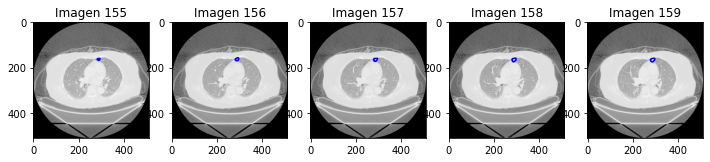

In [53]:
# Mostrar imagenes:
# patient.imshow(slices=(58,59,60,61), scaled=True) #170
# patient.imshow(slices=(107,108,109), scaled=True) #186
# patient.imshow(slices=(86,87,88,89), scaled=True)  #0001
patient.imshow(slices=(155,156,157,158,159), scaled=True)  #0121

obteniendo los datos...
realizando inferencia...
(5, 2, 512, 512)


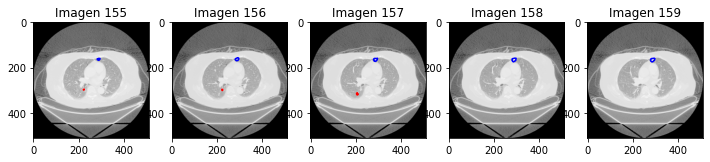

In [56]:
# patient = Patient("LIDC-IDRI-0002")
# patient.scale()
patient.imshow(slices=(155,156,157,158,159),
               scaled=True, 
               label=True, 
               model=model,
               threshold = 0.1,
               path2save=None,
               gpu = False)

In [50]:
torch.cuda.empty_cache()

In [51]:
yolo segment train data=/home/abel/yolo-dataset-10pcent_background/train.yaml model=yolov8l-seg.pt epochs=150 imgsz=512 optimizer='Adamax'


SyntaxError: invalid syntax (842469785.py, line 1)

In [ ]:
yolo val data=/home/abel/yolo-dataset-include02/train.yaml model=/home/abel/yolo-dataset-include02/runs/segment_en_path_erroneo/train2/weights/best.pt conf=0.000001
